In [73]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [24]:
data = pd.read_csv("L:\Big_data\DATA_B\Flowcam\data exp\pt\pt_lr_2_01_21_12_22_2\pt_lr_2_1_21_12_22_2_modified.csv")
data["num"] = 1
data_F = pd.read_csv("L:\Big_data\DATA_B\Flowcam\data exp\cv\cv_lr_4.2_18_12_22_2\cv lr 4.5 18.12.22 1200_modified.csv")
data_F["num"] = 2
data_F_2 = pd.read_csv(r"C:\Users\nati.TRANSALGAE\Python_ML_2023\images\BA IG LR 3.01 05.12.22_modified.csv")
data_F_2["num"] = 3
data_F = data_F.merge(data_F_2,how = "outer")
data_F["algae_bool"] = 0
data = data.merge(data_F,how = "outer")

In [25]:
mask = (data.algae_bool == 0) | (data.algae_bool == 1)
data = data[mask]

In [26]:
del data["Particle ID"]
#del data_F["Particle ID"]
del data["algae_num"]
del data["Feret Angle Max"]
del data["Feret Angle Min"]
# del data_F["Feret Angle Max"]
# del data_F["Feret Angle Min"]

C:\Users\nati.TRANSALGAE\Anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



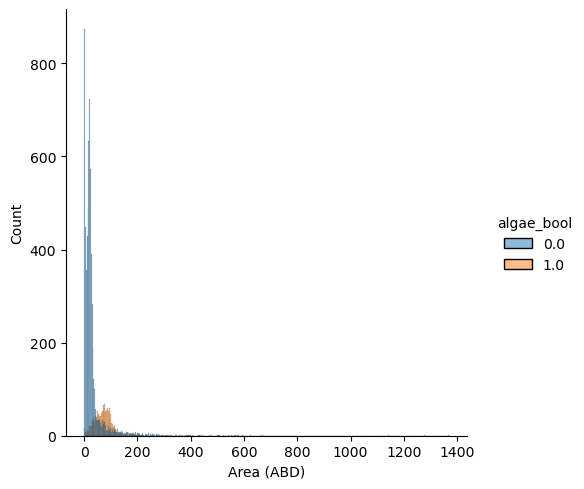

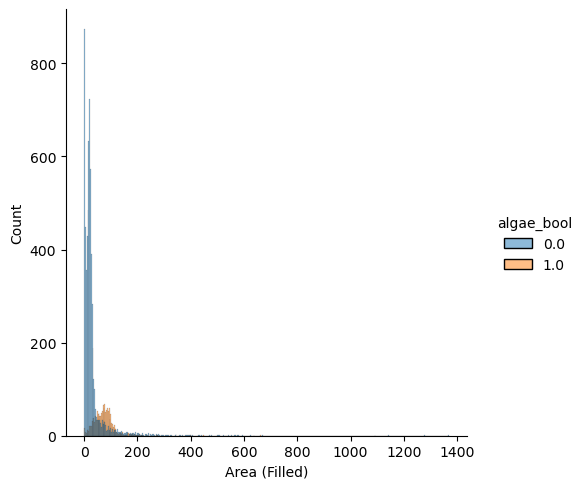

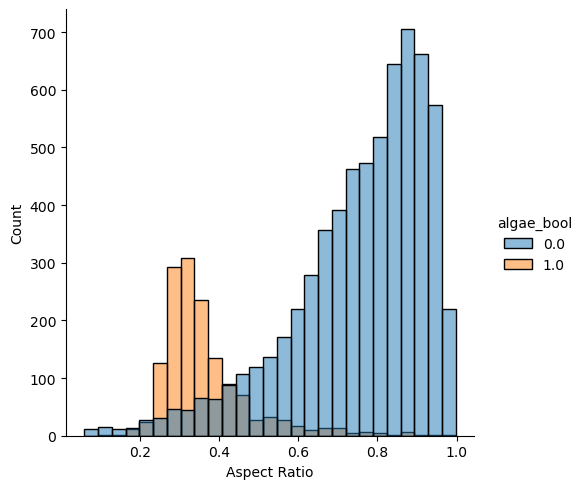

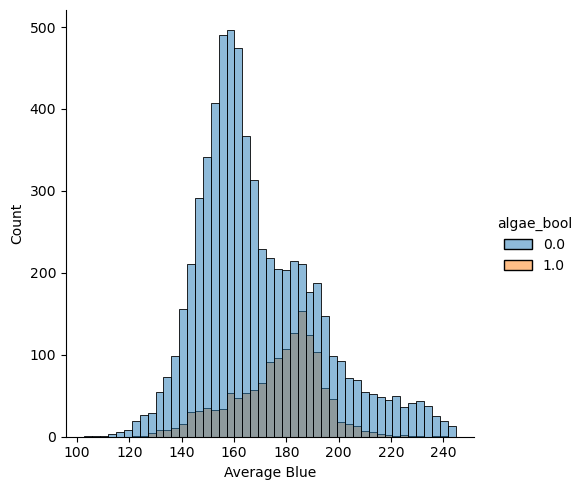

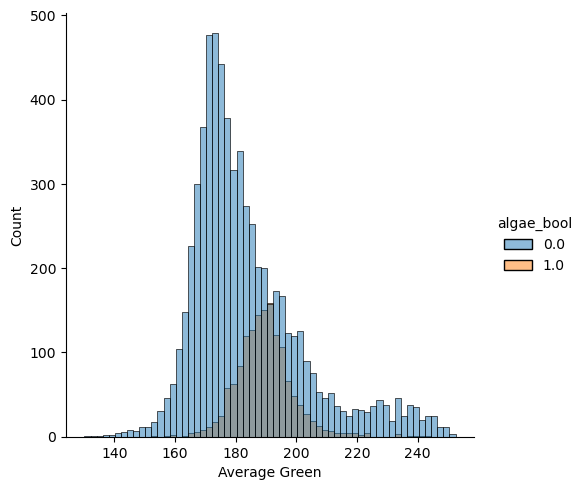

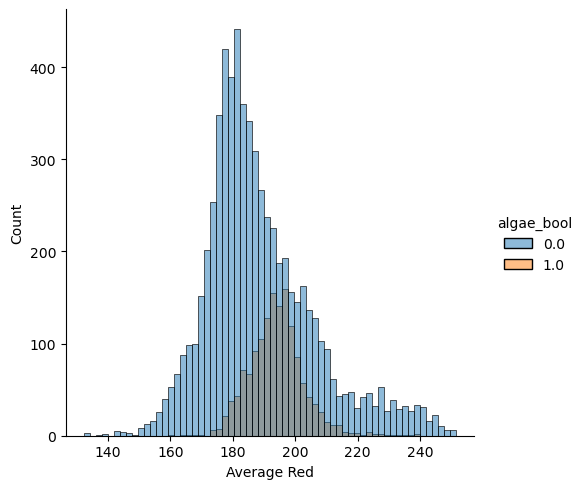

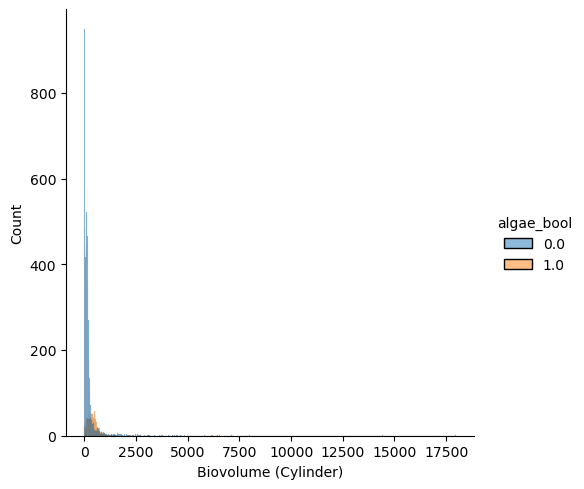

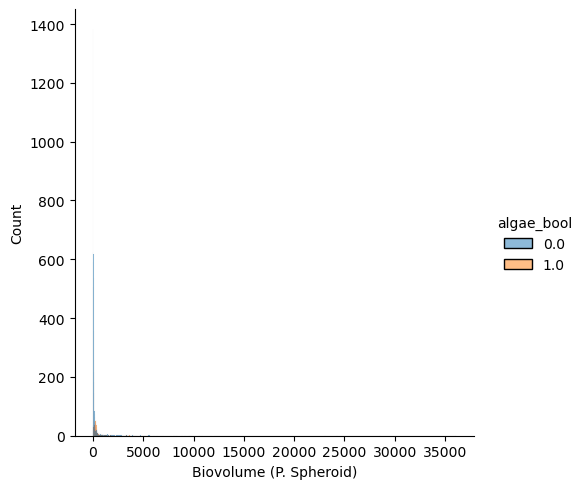

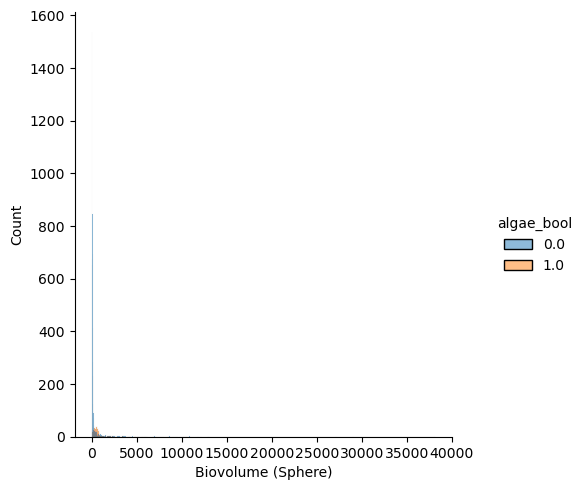

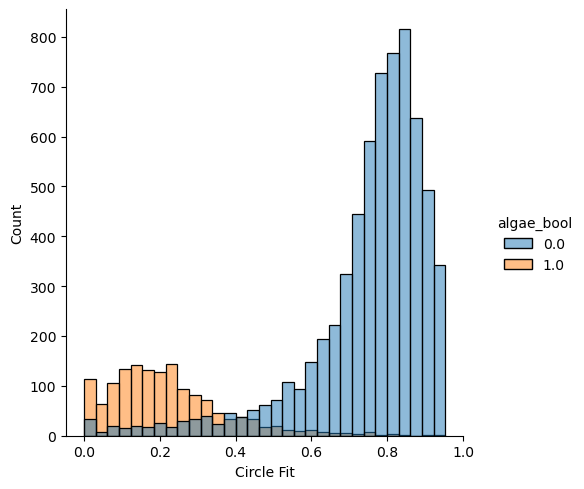

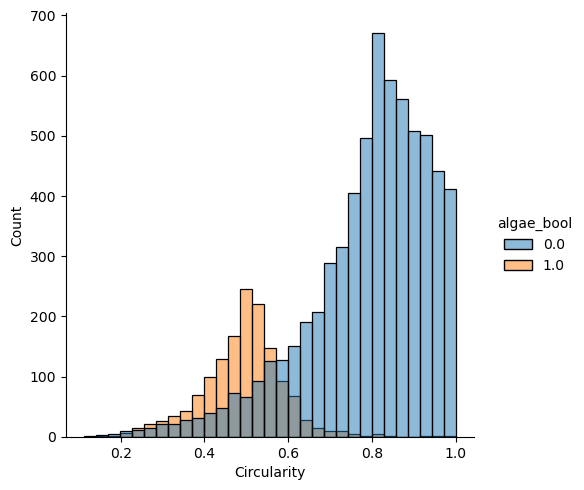

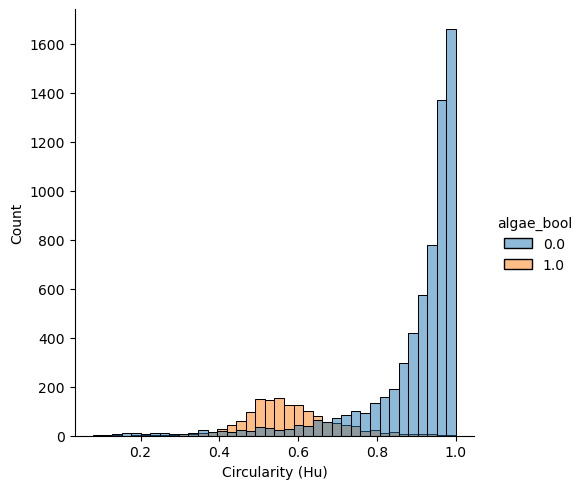

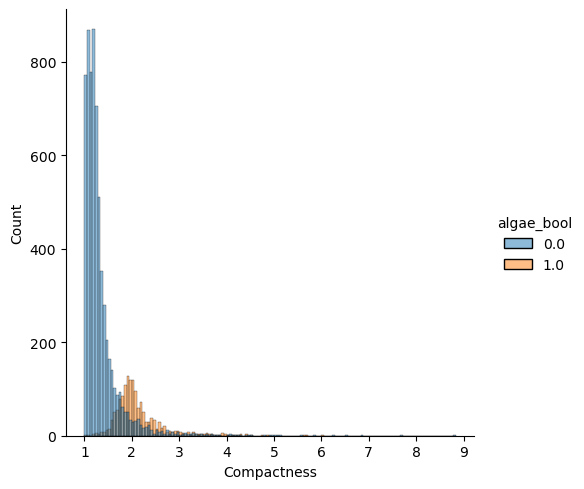

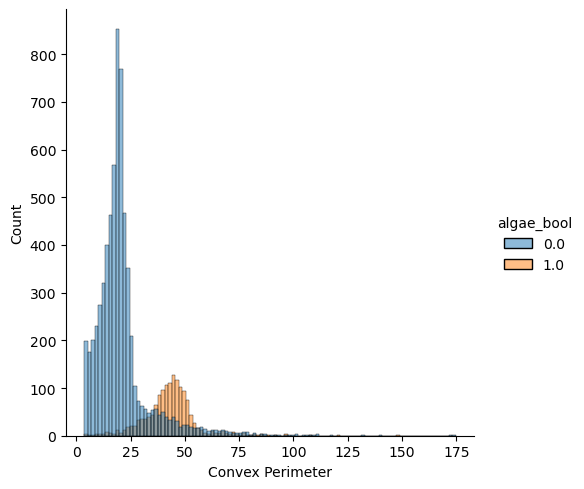

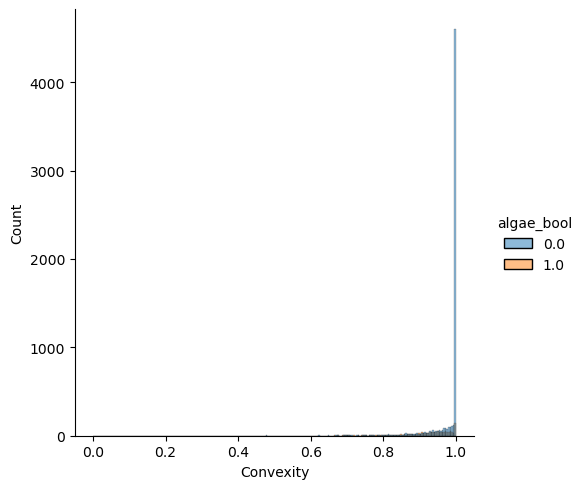

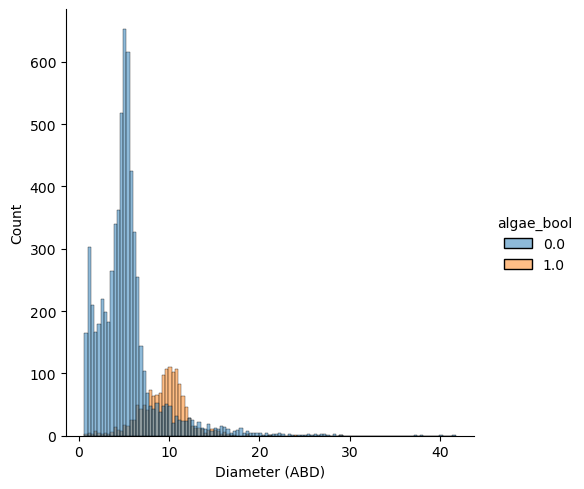

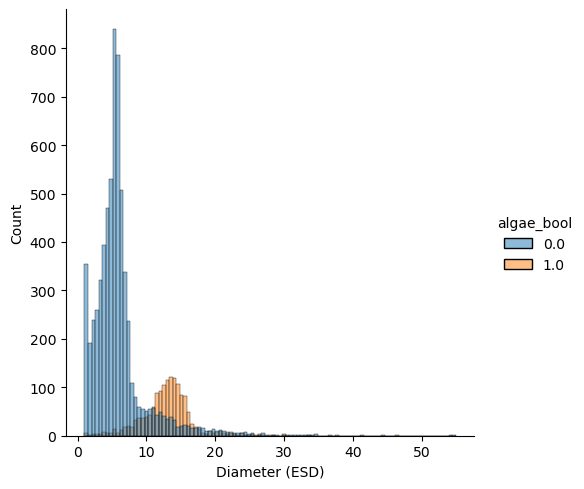

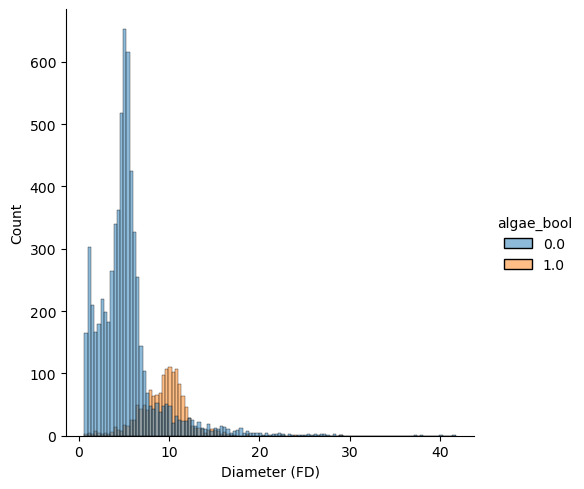

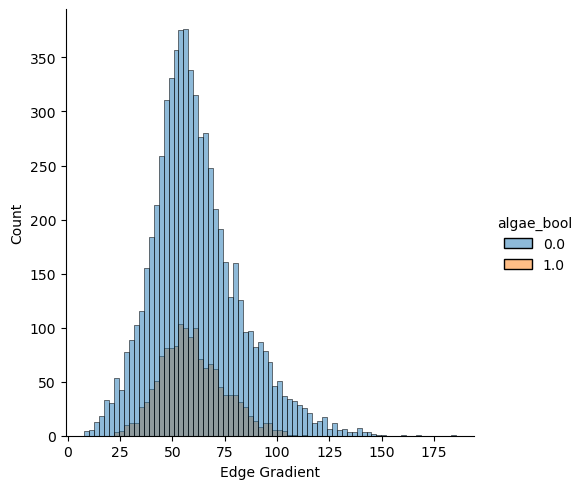

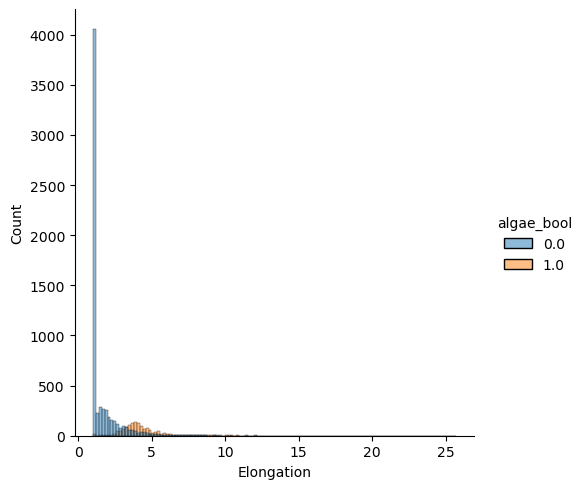

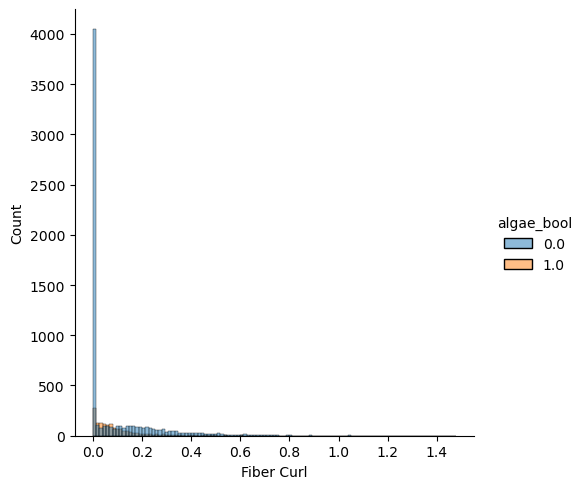

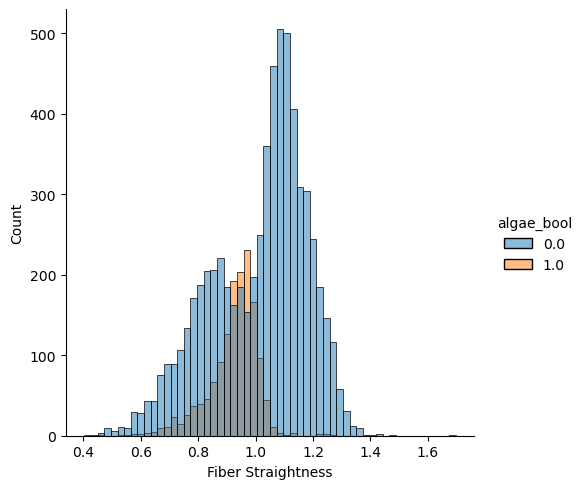

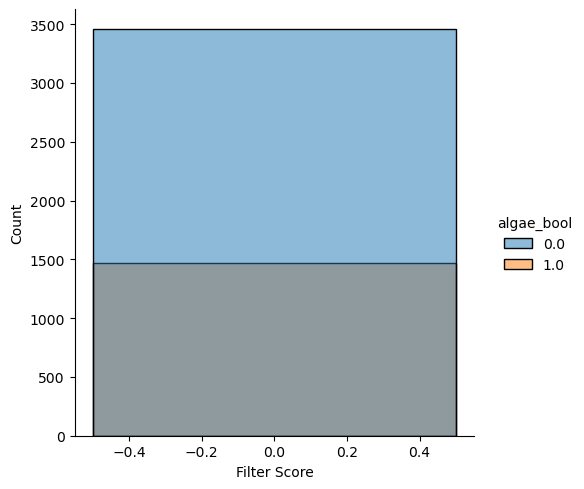

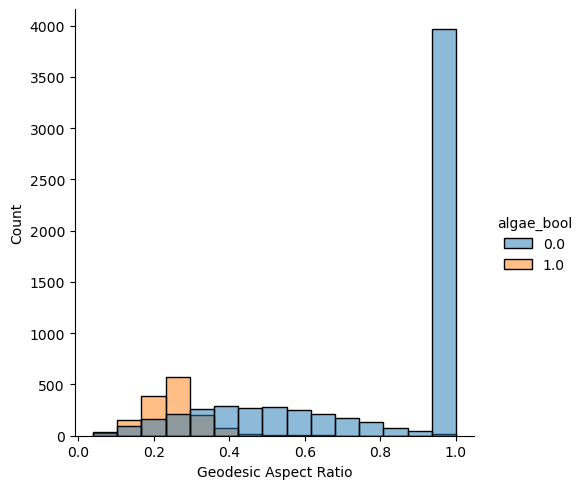

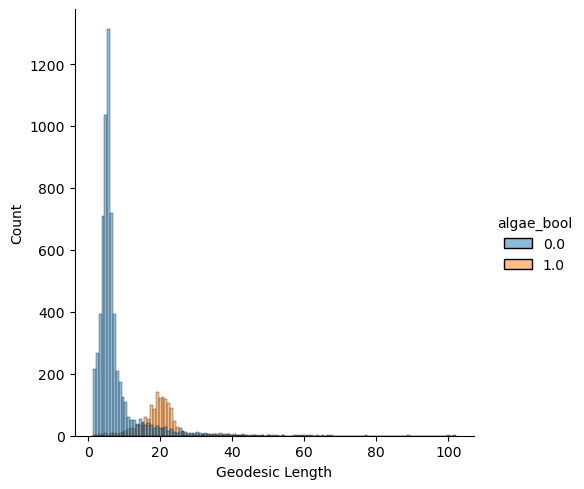

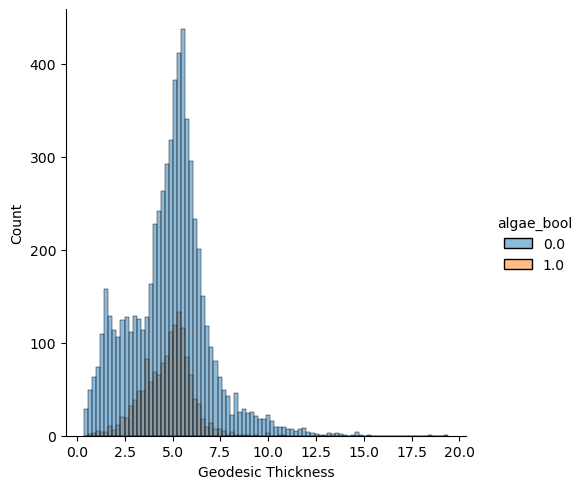

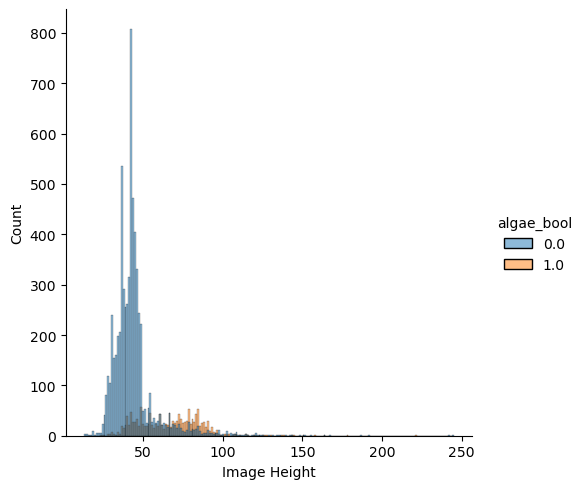

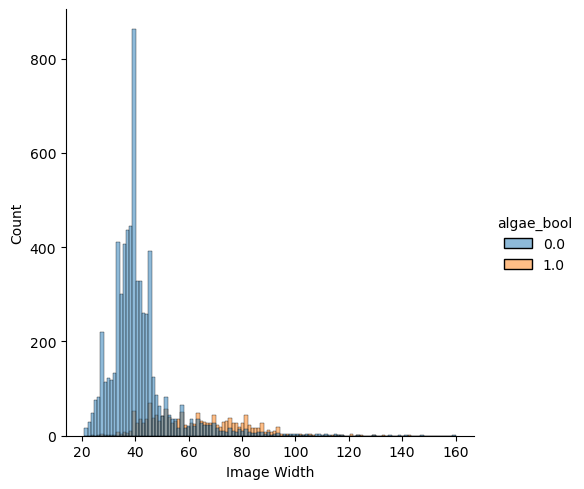

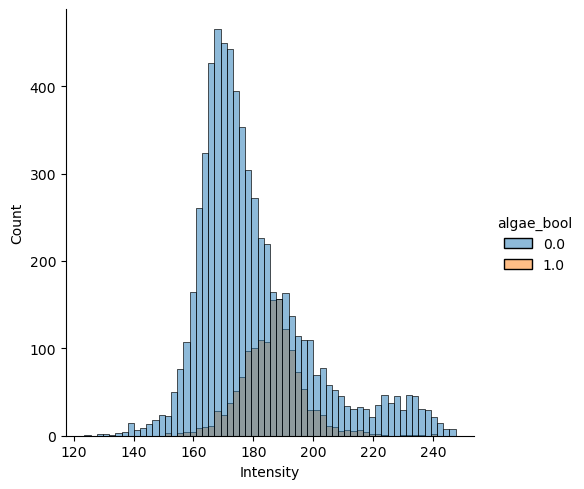

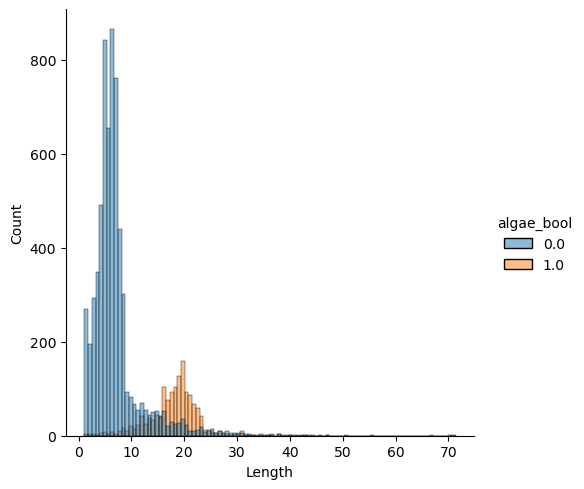

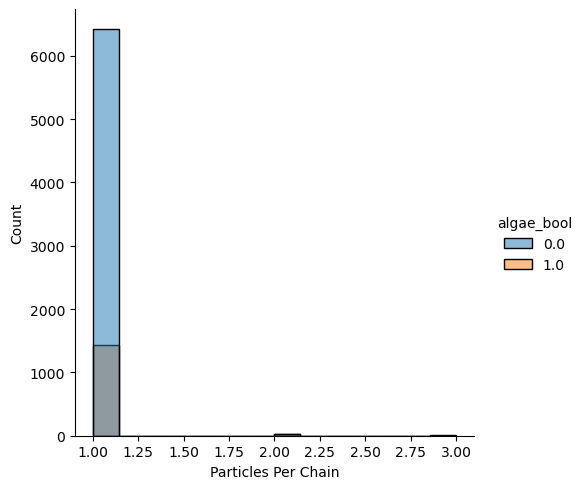

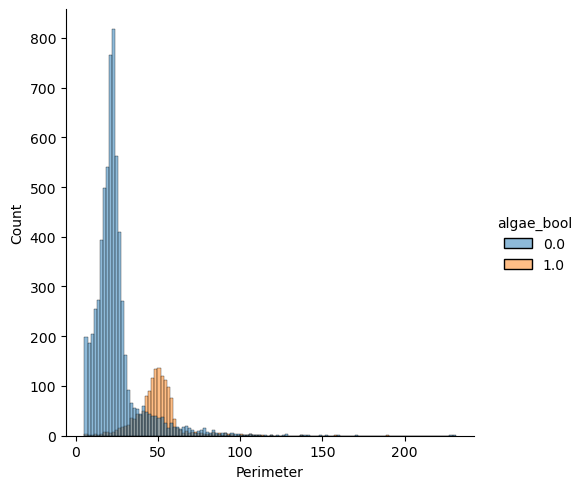

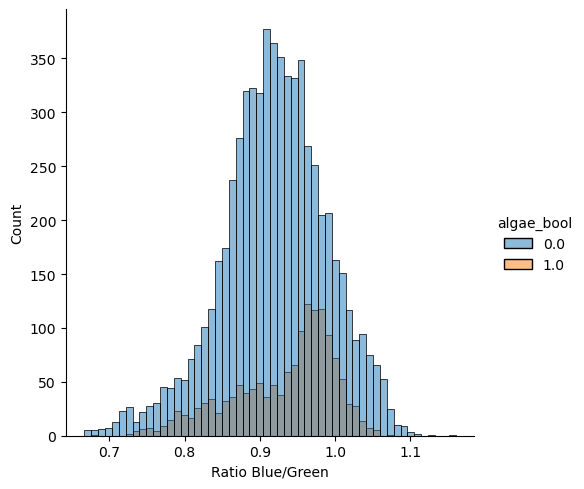

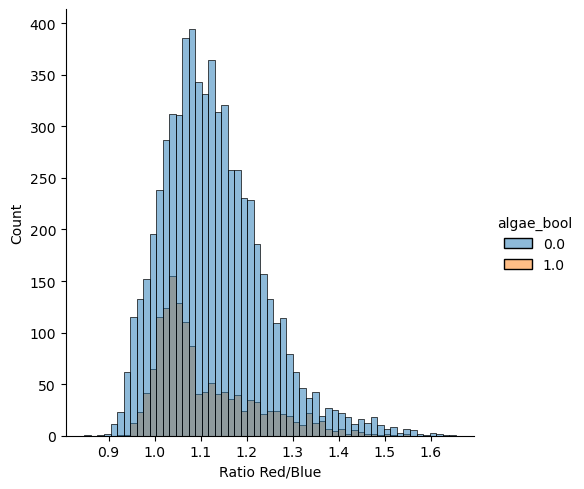

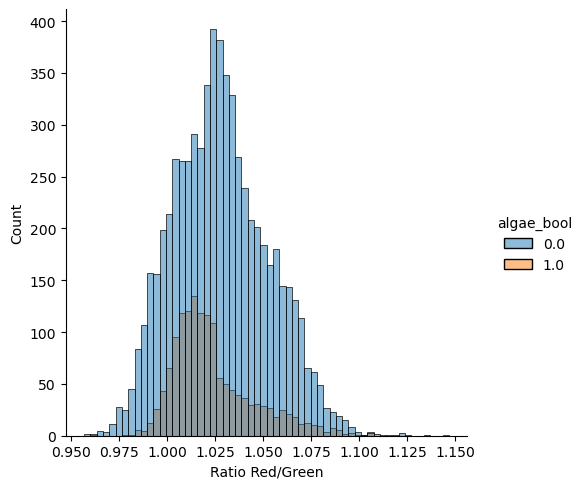

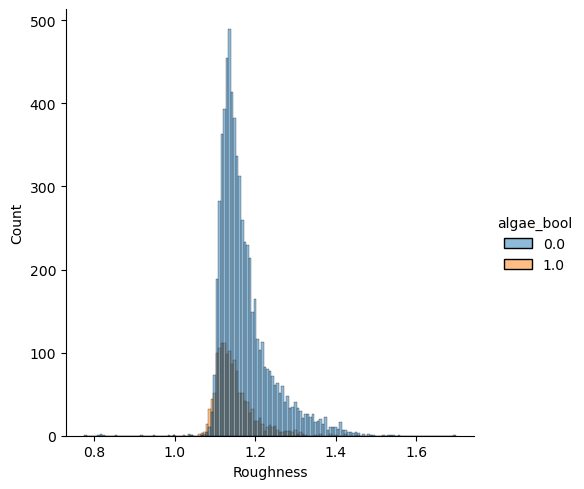

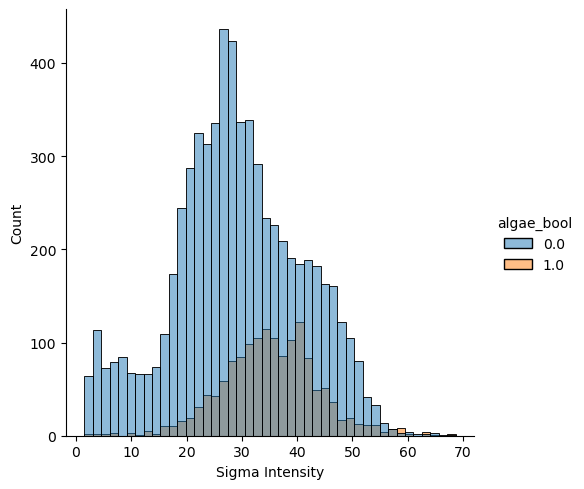

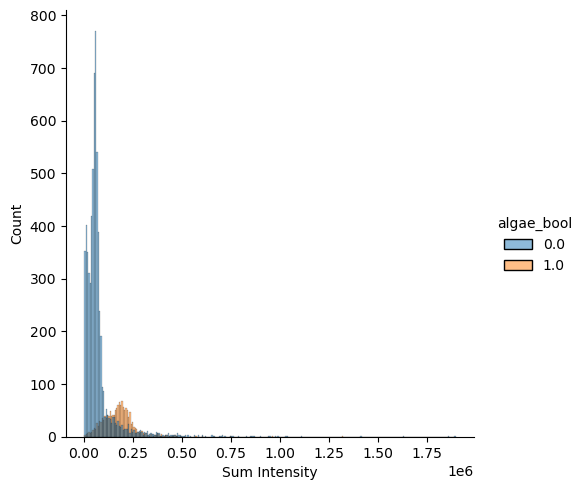

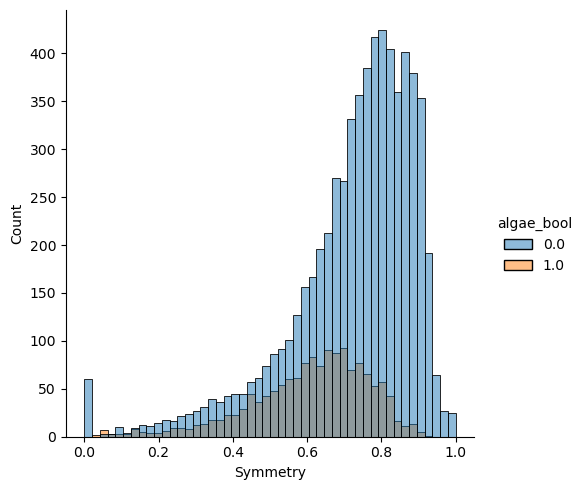

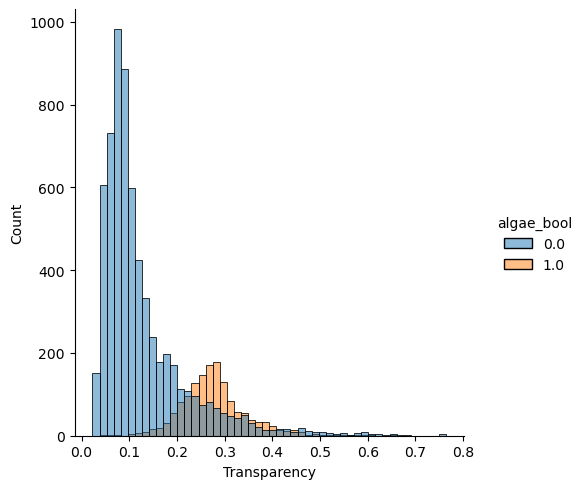

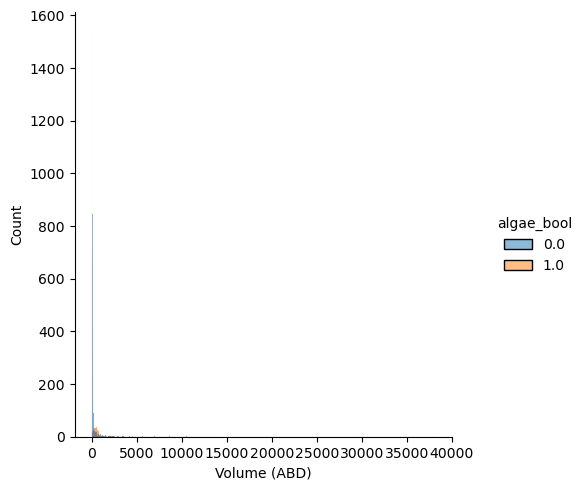

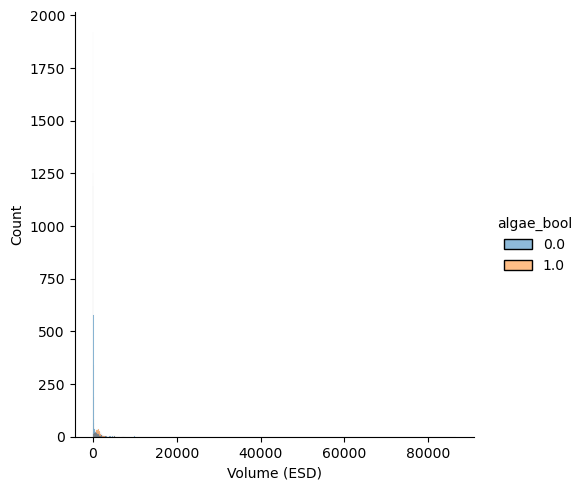

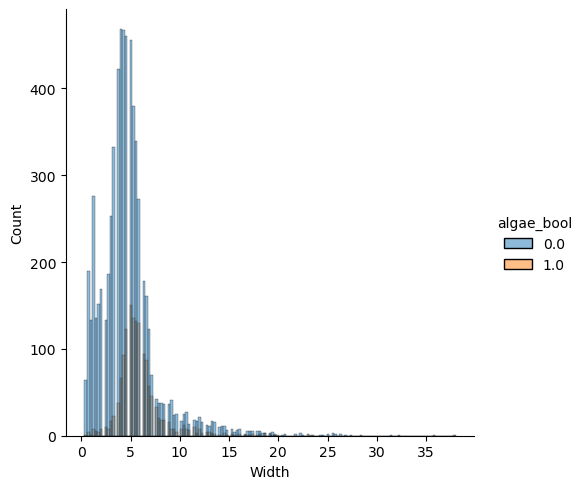

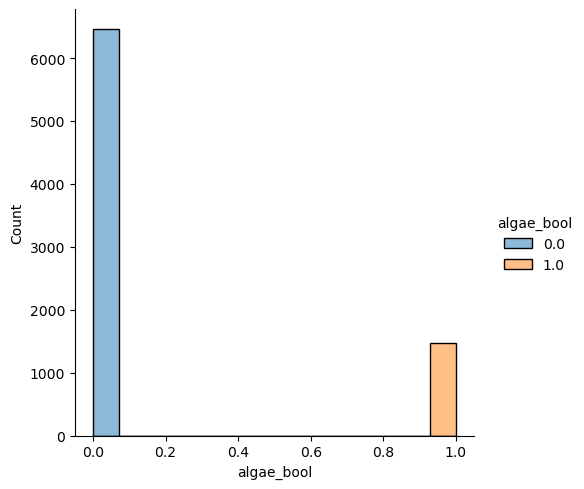

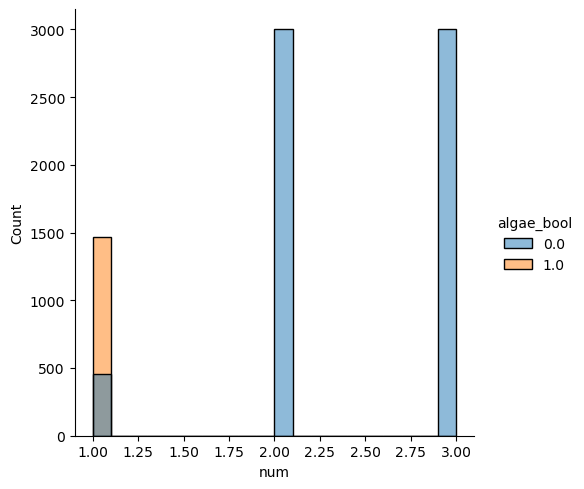

In [81]:
for col in data.columns:
    sns.displot(data, x=col, hue="algae_bool")
plt.show()

Area (ABD)


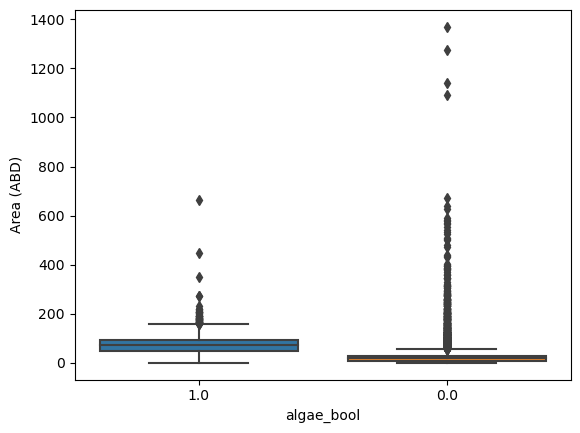

Area (Filled)


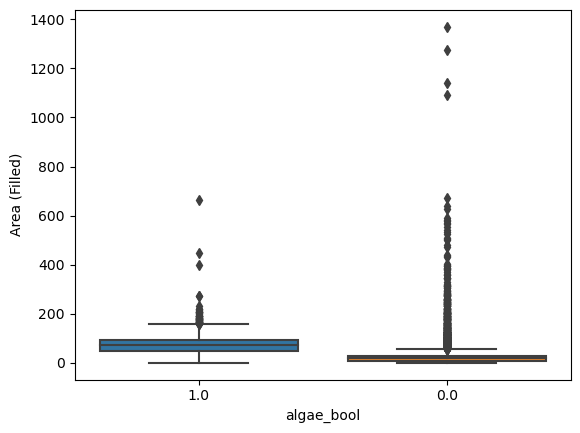

Aspect Ratio


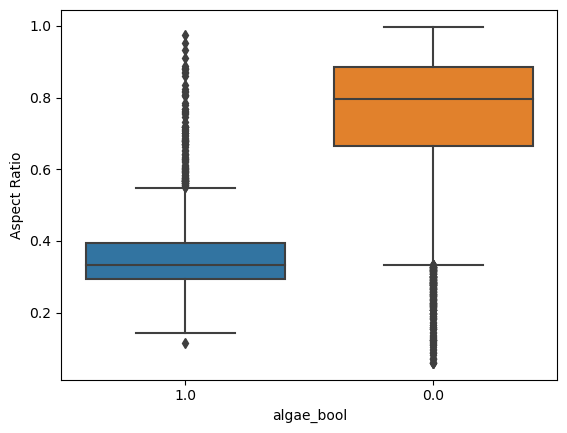

Average Blue


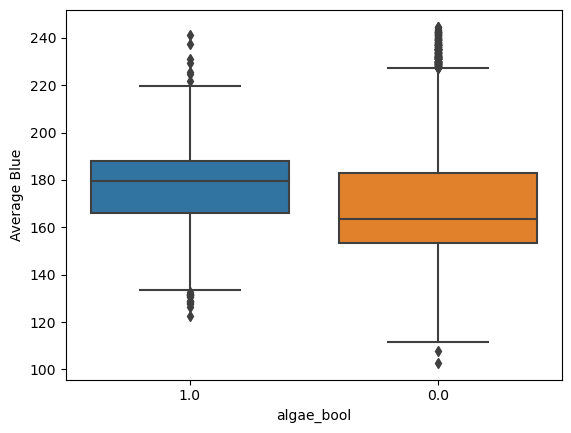

Average Green


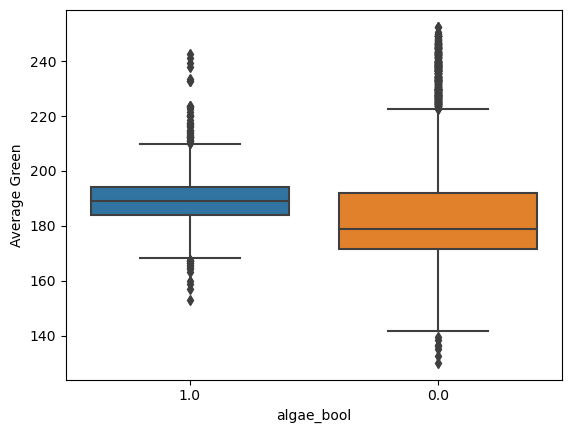

Average Red


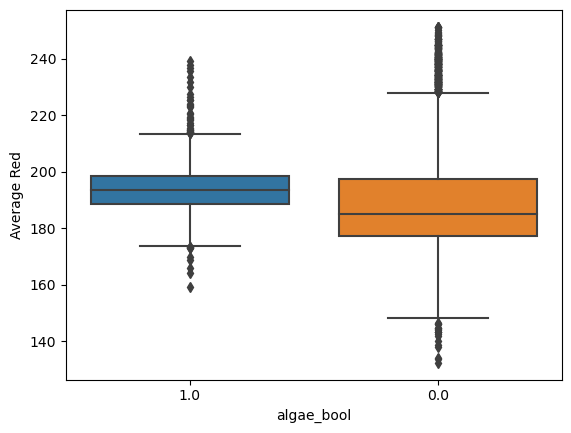

Biovolume (Cylinder)


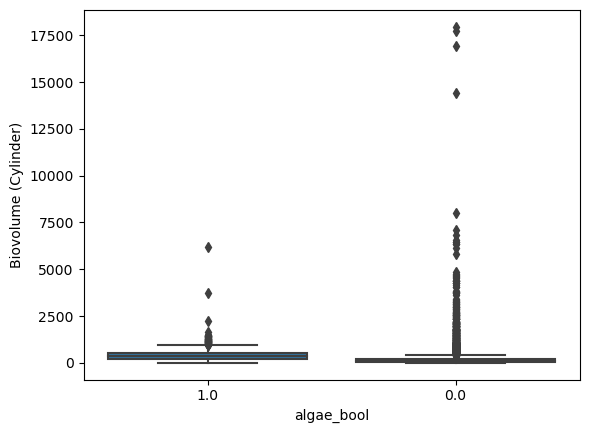

Biovolume (P. Spheroid)


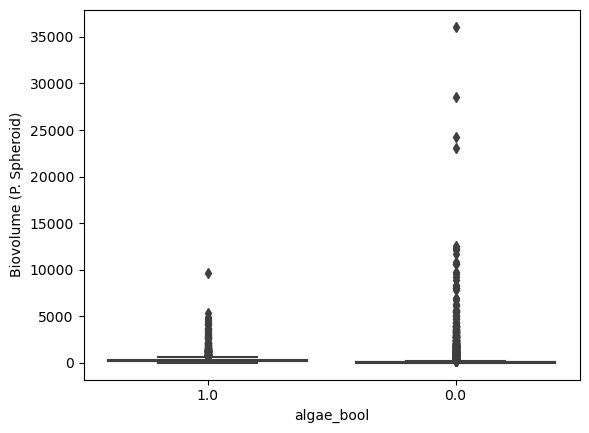

Biovolume (Sphere)


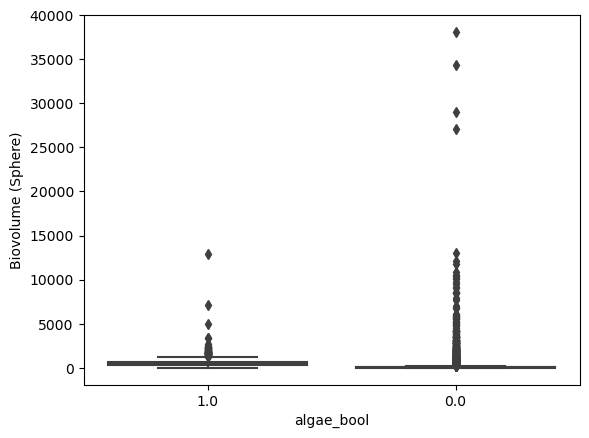

Circle Fit


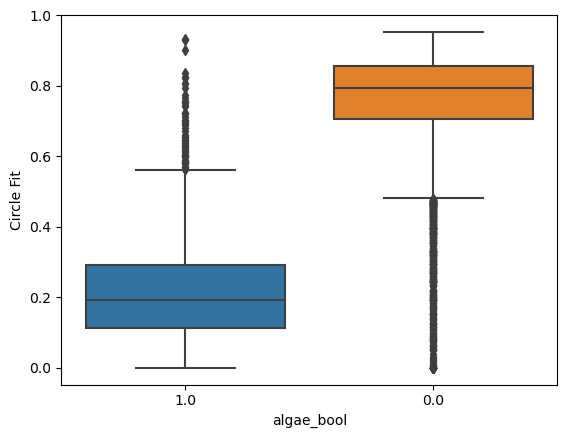

Circularity


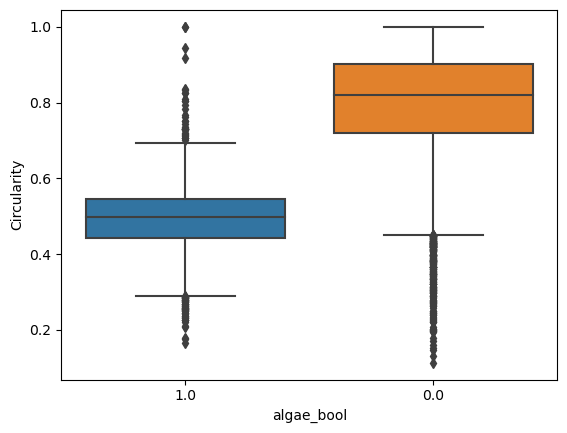

Circularity (Hu)


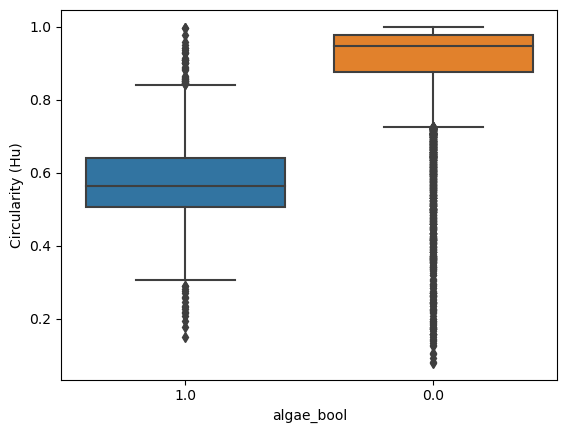

Compactness


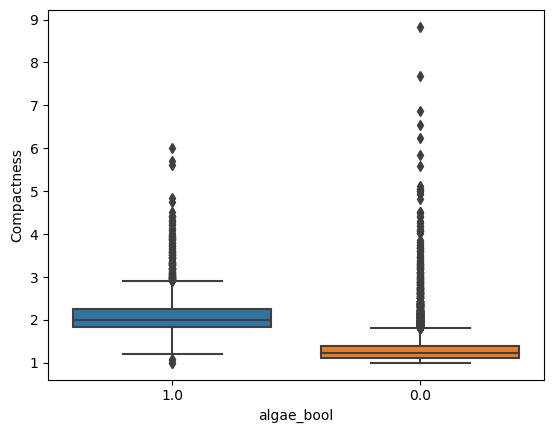

Convex Perimeter


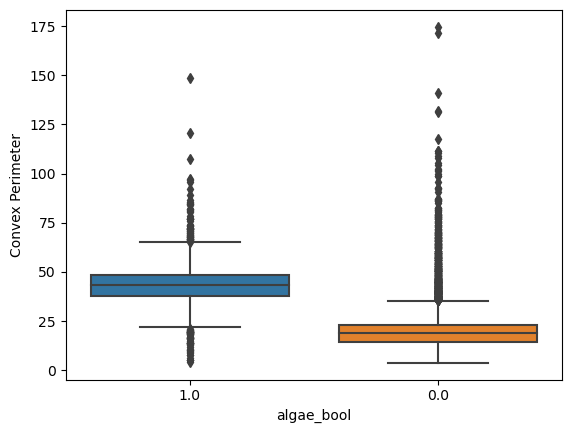

Convexity


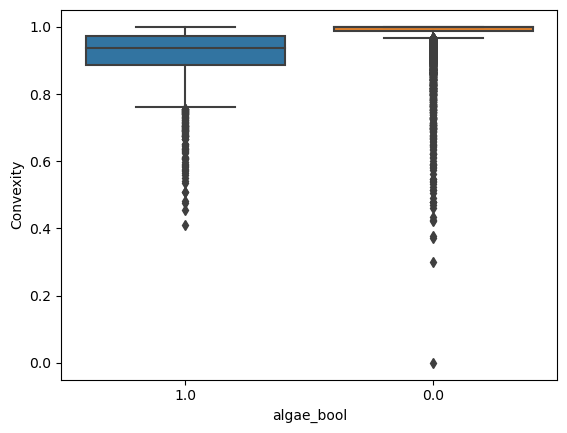

Diameter (ABD)


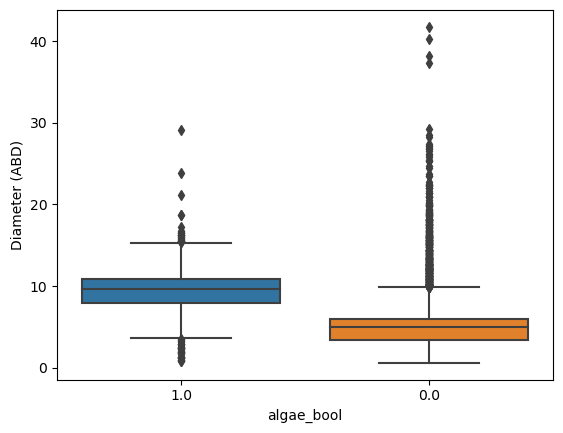

Diameter (ESD)


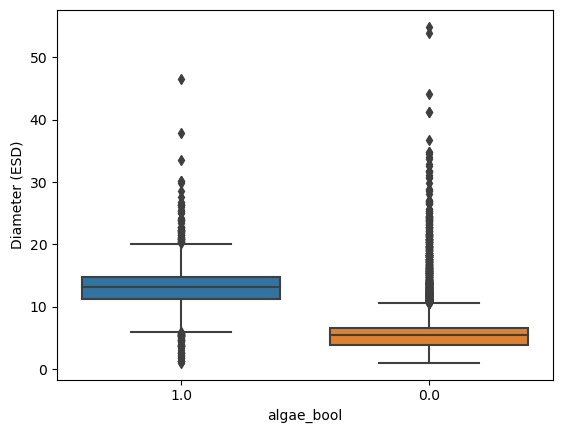

Diameter (FD)


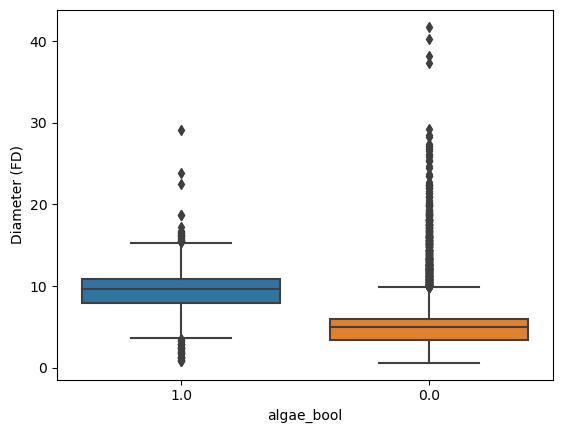

Edge Gradient


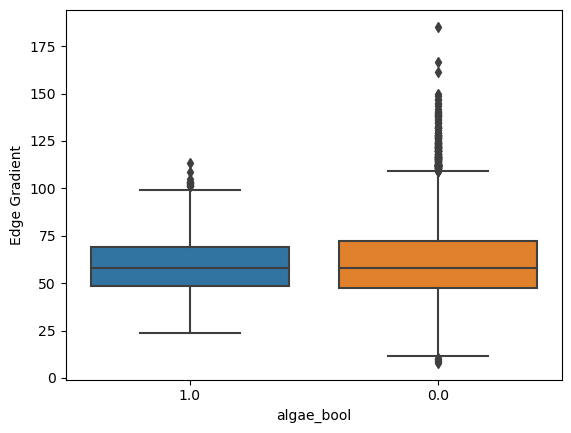

Elongation


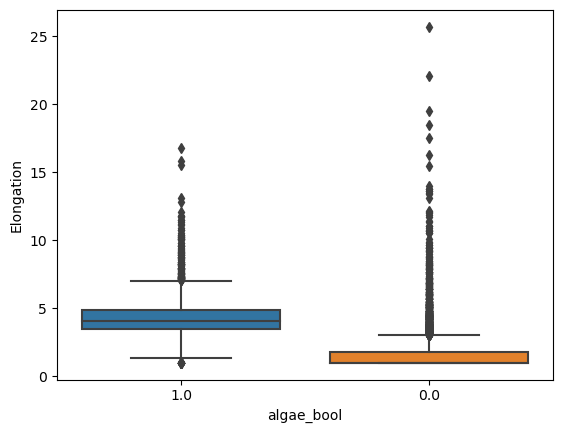

Fiber Curl


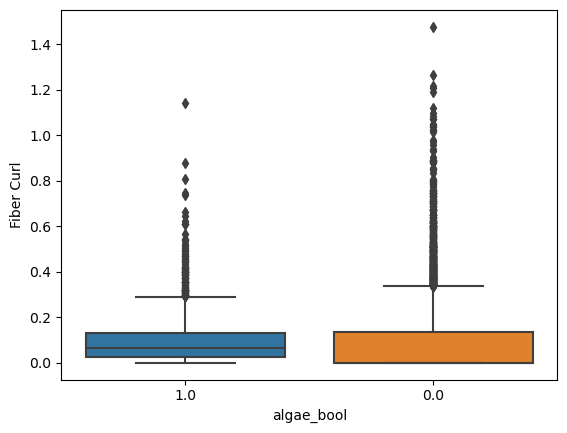

Fiber Straightness


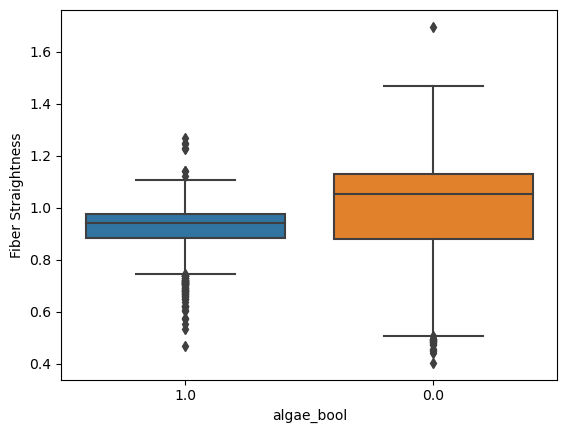

Filter Score


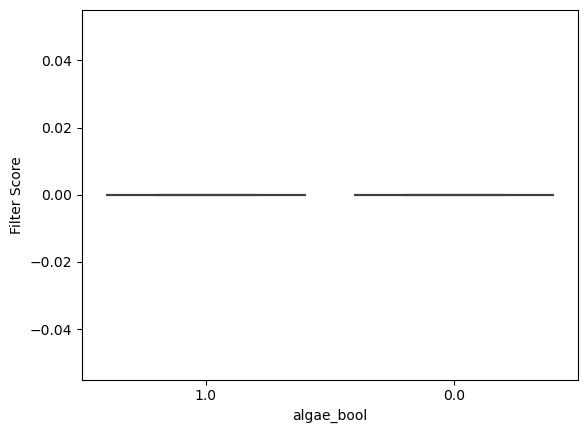

Geodesic Aspect Ratio


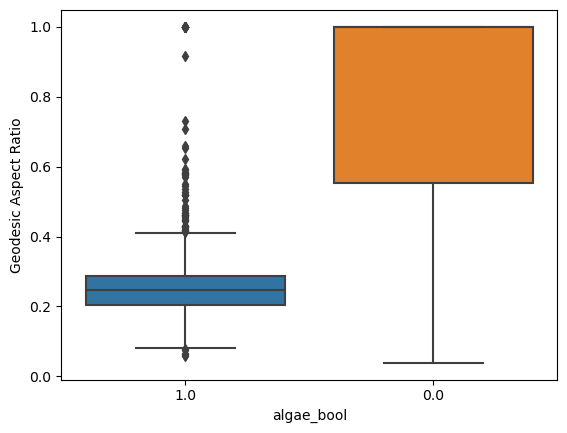

Geodesic Length


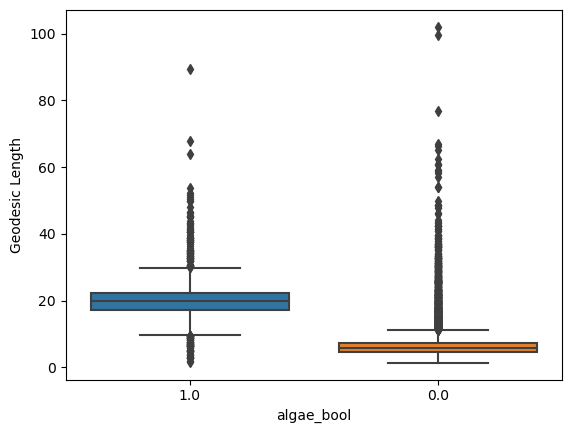

Geodesic Thickness


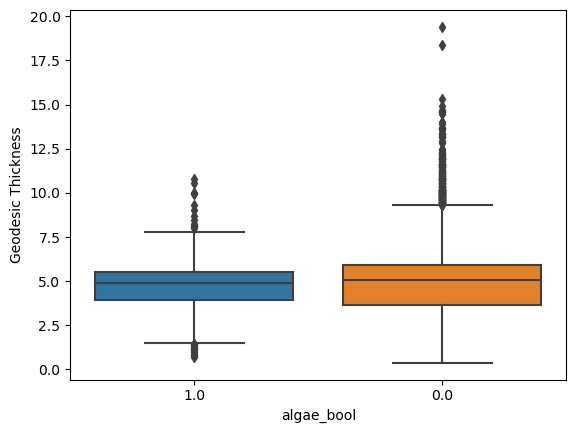

Image Height


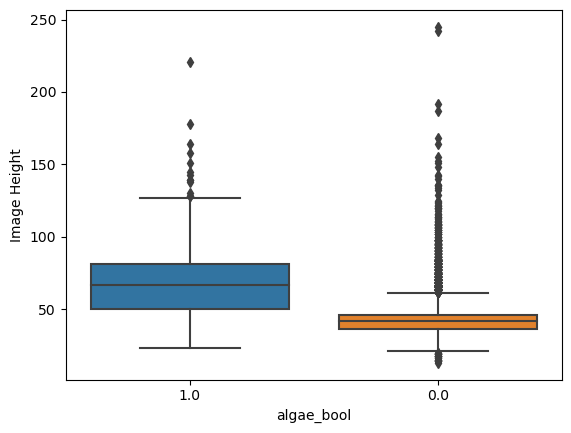

Image Width


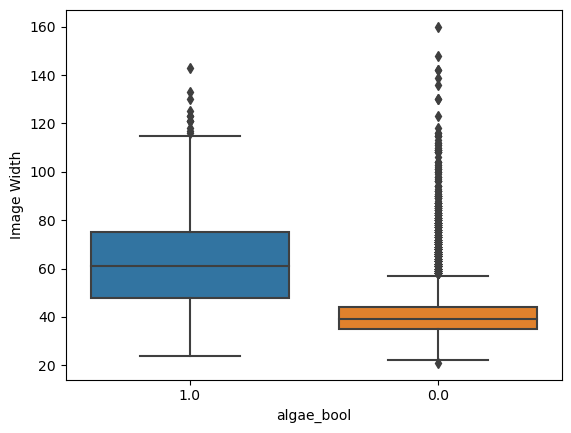

Intensity


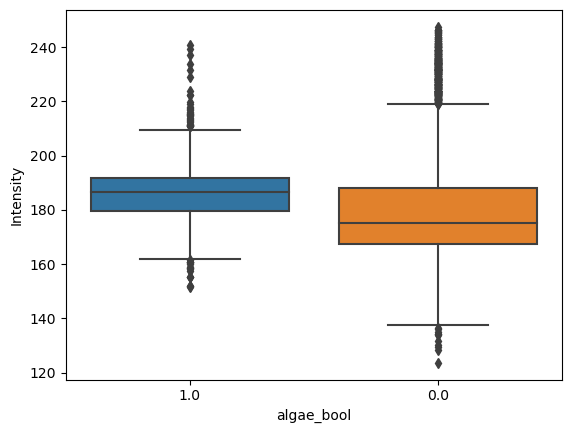

Length


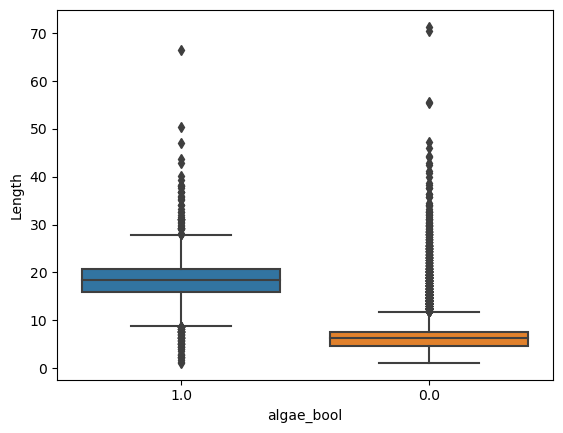

Particles Per Chain


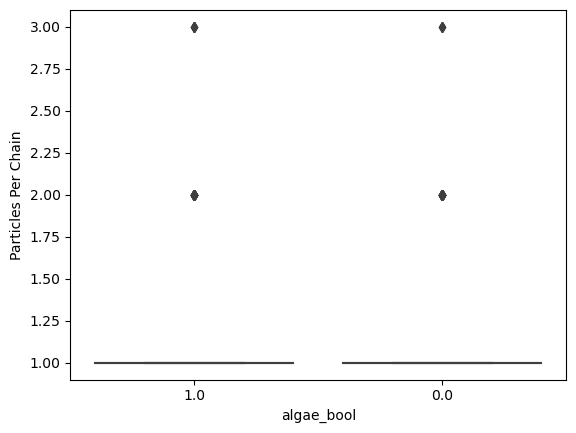

Perimeter


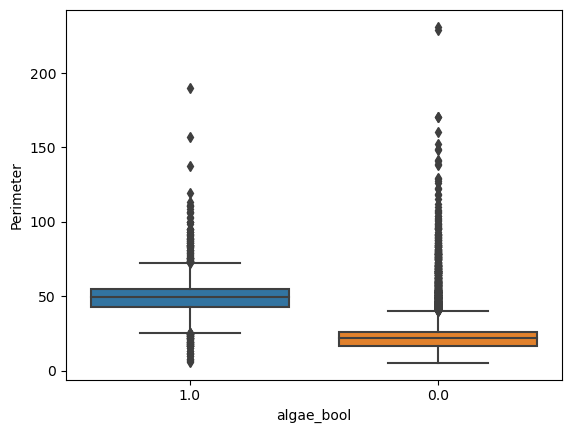

Ratio Blue/Green


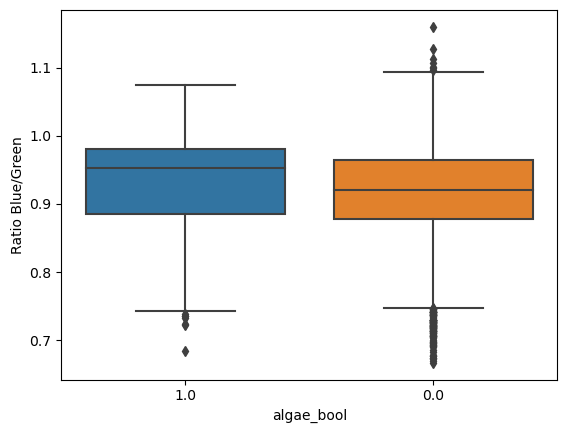

Ratio Red/Blue


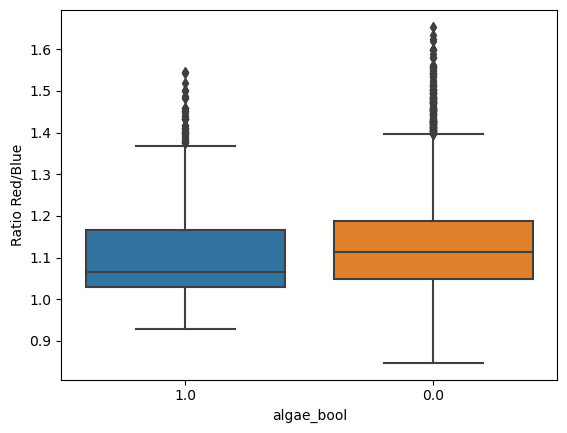

Ratio Red/Green


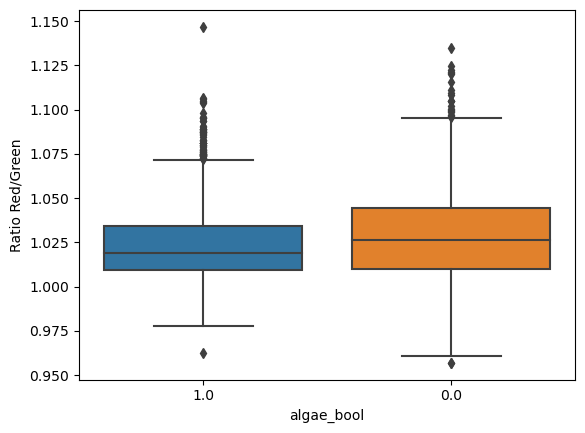

Roughness


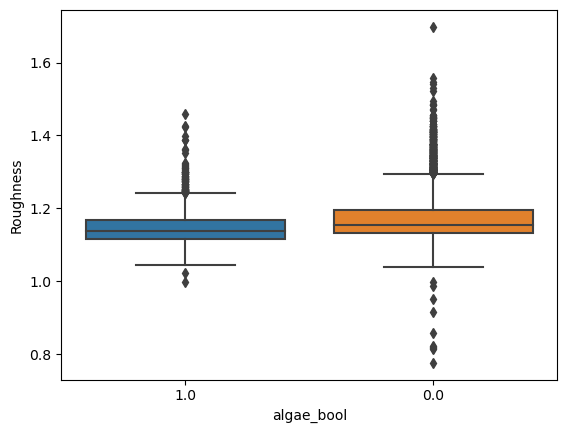

Sigma Intensity


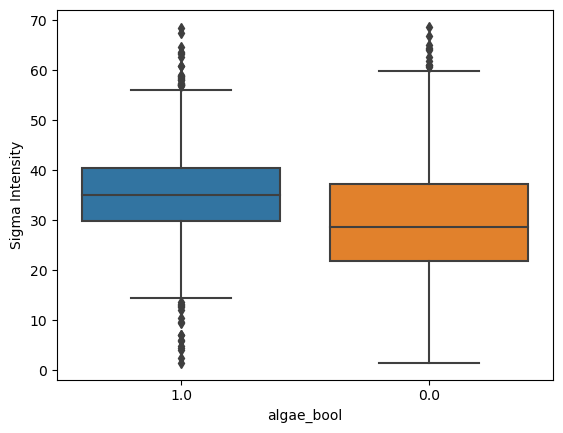

Sum Intensity


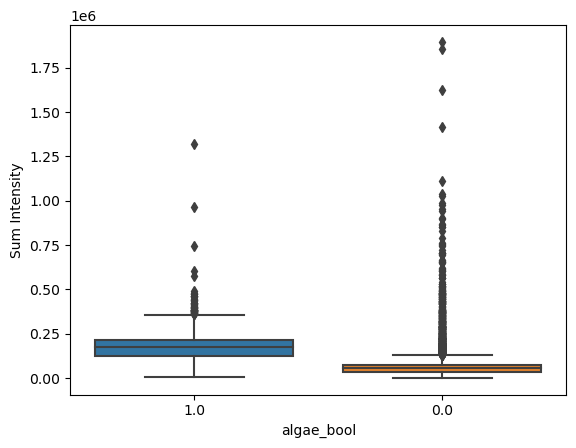

Symmetry


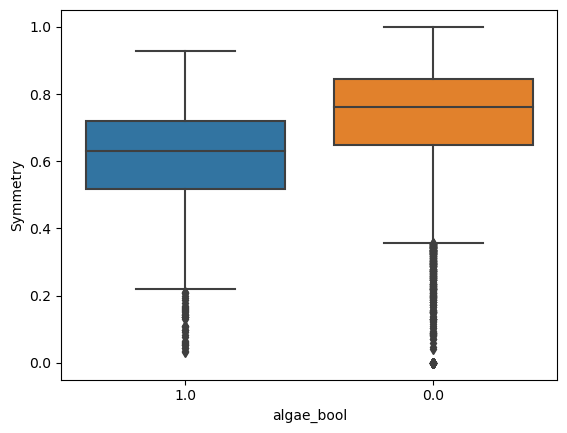

Transparency


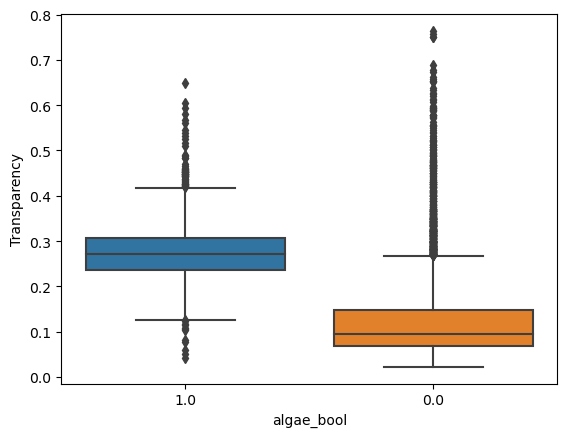

Volume (ABD)


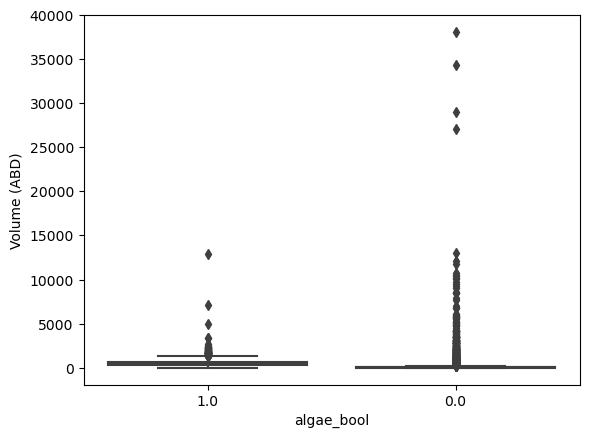

Volume (ESD)


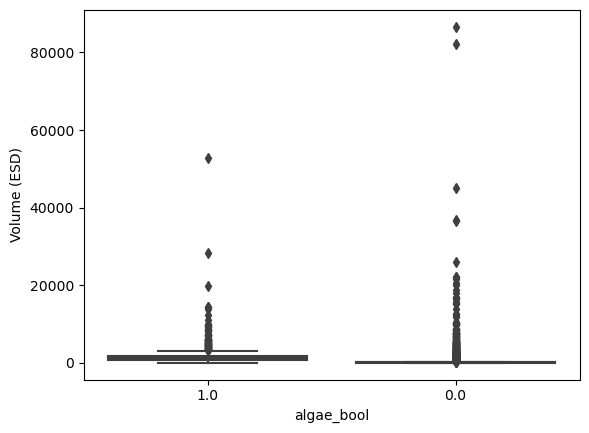

Width


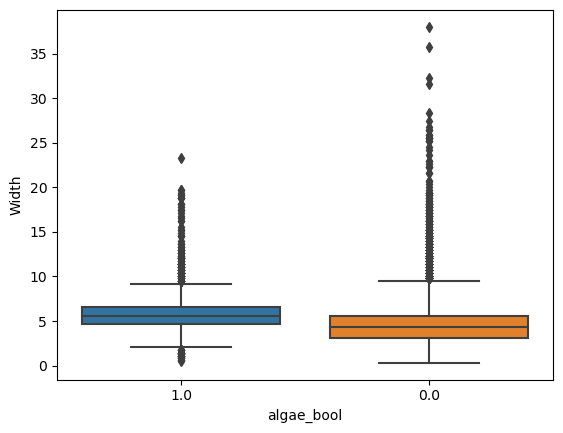

algae_bool


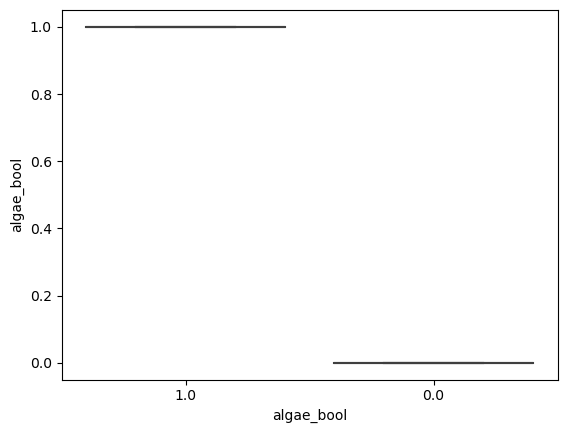

In [28]:
for col in data.columns[:-1]:
    print(col)
    sns.boxplot(data = data, x="algae_bool", y = col, order=[1.0, 0.0])
    plt.show()

In [62]:
mask = data["algae_bool"] == 0
data_aspect_ratio = data[mask]
mean_AR_0 = data_aspect_ratio["Aspect Ratio"].mean()
length_AR_0 = len(data_aspect_ratio["Aspect Ratio"])
std_AR_0 = data_aspect_ratio["Aspect Ratio"].std()
var_over_sample_size_AR_0 = std_AR_0**2/length_AR_0

In [63]:
mask = data["algae_bool"] == 1
data_aspect_ratio = data[mask]
mean_AR_1 = data_aspect_ratio["Aspect Ratio"].mean()
length_AR_1 = len(data_aspect_ratio["Aspect Ratio"])
std_AR_1 = data_aspect_ratio["Aspect Ratio"].std()
var_over_sample_size_AR_1 = std_AR_1**2/length_AR_1

In [72]:
# T score of aspect ration mean differance between PT and other species
import math
buttom = mean_AR_1-mean_AR_0 - 1.96*(math.sqrt(var_over_sample_size_AR_1+var_over_sample_size_AR_0))
up     = mean_AR_1-mean_AR_0 + 1.96*(math.sqrt(var_over_sample_size_AR_1+var_over_sample_size_AR_0))
Z = (mean_AR_1-mean_AR_0)/math.sqrt(var_over_sample_size_AR_1+var_over_sample_size_AR_0)
print(Z)

-106.29513540090409


In [43]:
mask

[933      False
 934      False
 935      False
 936      False
 938      False
          ...  
 10995     True
 10996     True
 10997     True
 10998     True
 10999     True
 Name: algae_bool, Length: 7922, dtype: bool]

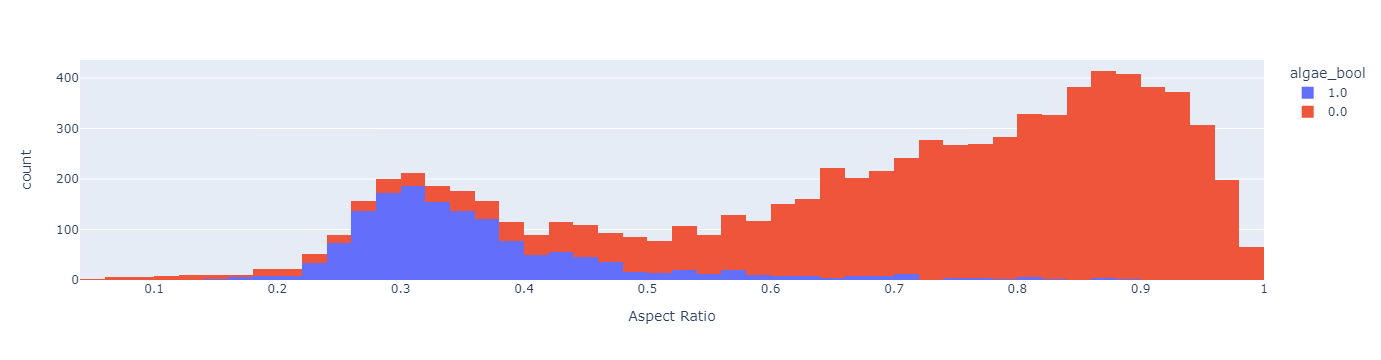

In [83]:
px.histogram(data, x="Aspect Ratio", color="algae_bool")

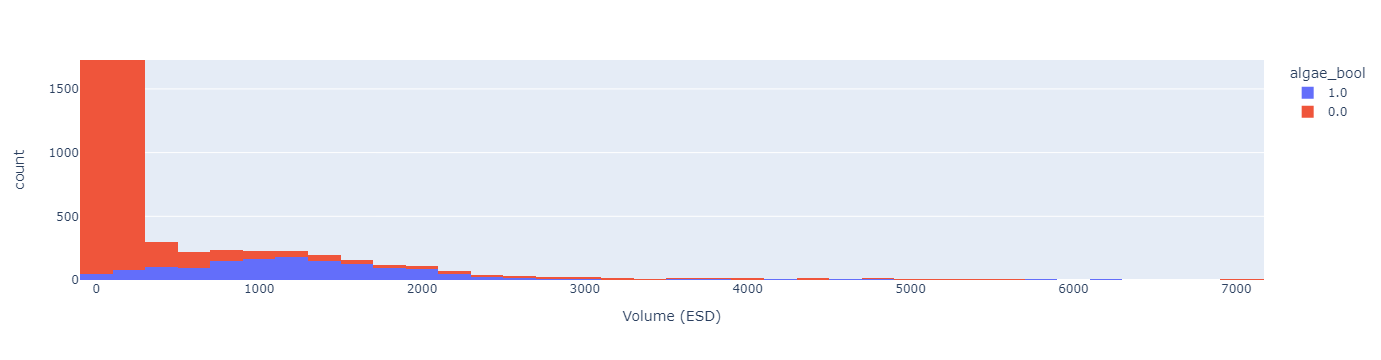

In [84]:
px.histogram(data, x="Volume (ESD)", color="algae_bool")

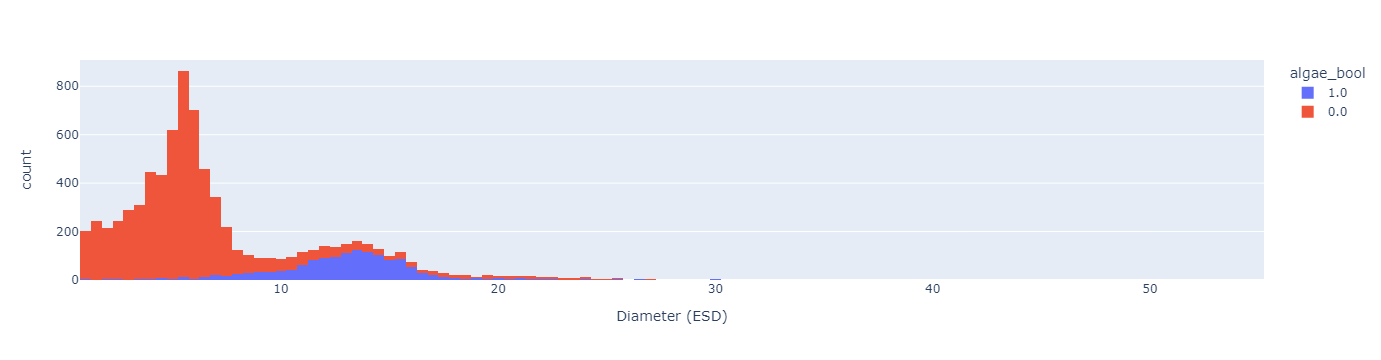

In [85]:
px.histogram(data, x="Diameter (ESD)", color="algae_bool")

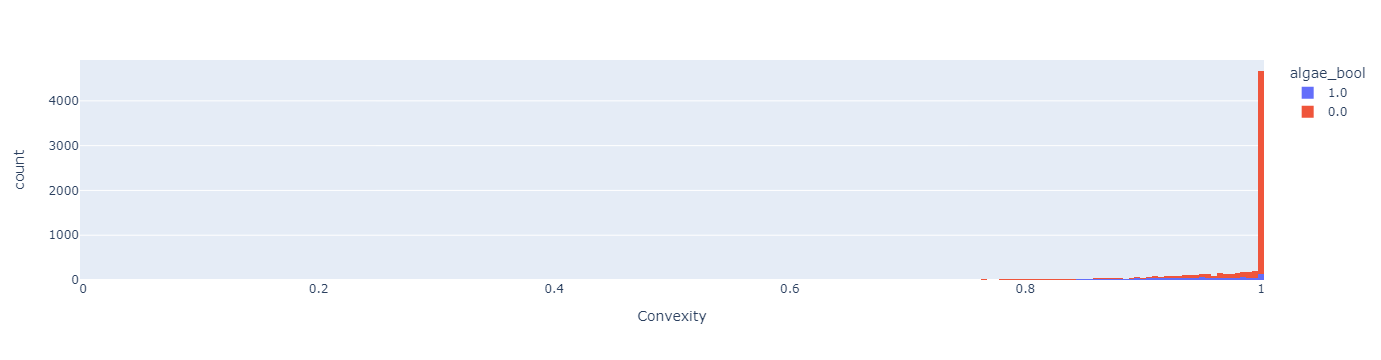

In [87]:
px.histogram(data, x="Convexity", color="algae_bool")

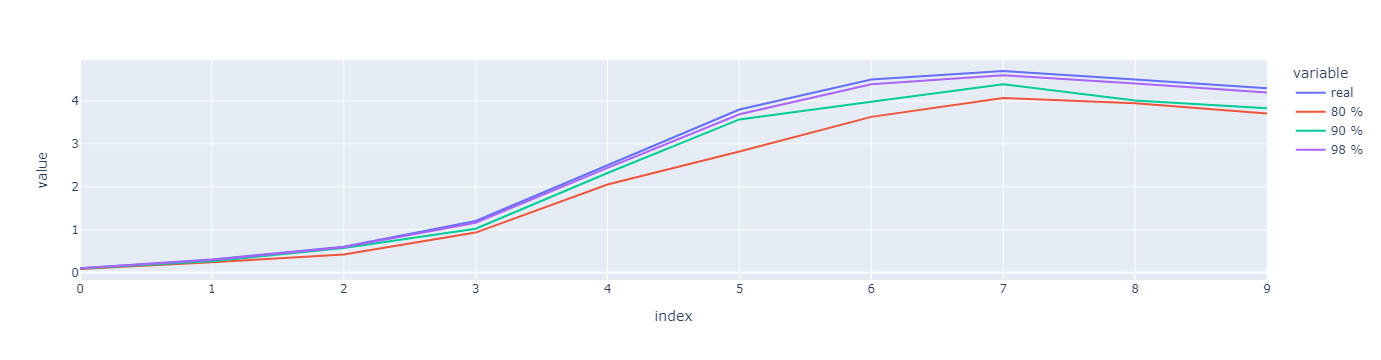

In [59]:
import numpy as np
import pandas as pd
import plotly.express as px
import random

denstisies_in_g_l = {"Day 1": 0.1,
                     "Day 2": 0.3, 
                     "Day 3": 0.6,
                     "Day 4": 1.2,
                     "Day 5": 2.5,
                     "Day 6": 3.8,
                     "Day 7": 4.5,
                     "Day 8": 4.7, 
                     "Day 9": 4.5, 
                     "Day 10": 4.3}

# Generate random accuracy between 80% and 90%
accuracy_random_90 = []
for density in denstisies_in_g_l.values():
    accuracy = density * random.uniform(0.85, 0.95)
    accuracy_random_90.append(round(accuracy, 2))
    
accuracy_random_98 = []
for density in denstisies_in_g_l.values():
    accuracy = density * random.uniform(0.97, 0.99)
    accuracy_random_98.append(round(accuracy, 2))

accuracy_random_80 = []
for density in denstisies_in_g_l.values():
    accuracy = density * random.uniform(0.7, 0.9)
    accuracy_random_80.append(round(accuracy, 2))
dic = {"real":denstisies_in_g_l.values(),"80 %":accuracy_random_80,"90 %":accuracy_random_90,"98 %":accuracy_random_98}

data = pd.DataFrame(data = dic) 
px.line(data ,y=["real","80 %","90 %","98 %"])

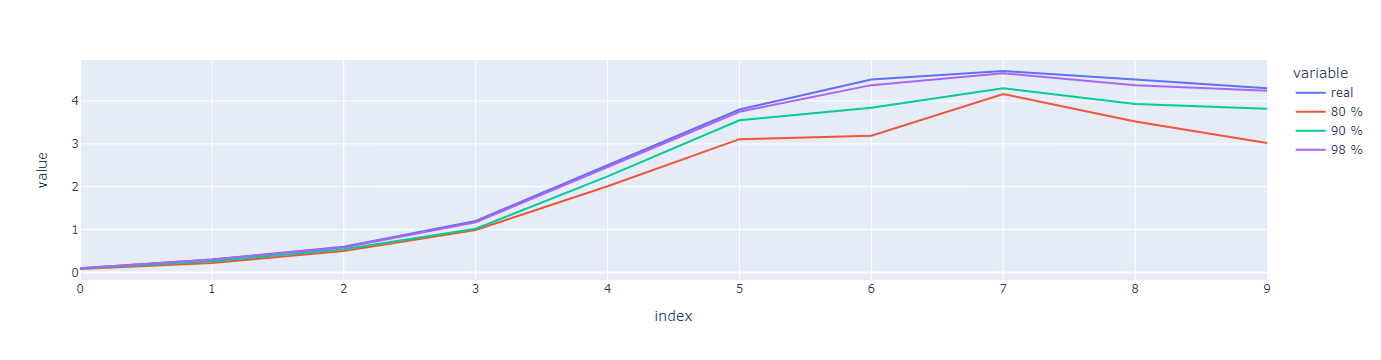

In [54]:
px.line(data ,y=["real","80 %","90 %","98 %"])

In [ ]:
# benefits of accuracy
# reliable data
# helps in dessicion making such as fertilizing and dilution
# 

In [58]:
ones = [1,1,1,1,1,1,1,1,1]
results = []
for one in ones:
    fraq = one*random.uniform(0.8,1)
    results.append(fraq)
results

[0.9613079813769253,
 0.837167040507632,
 0.8022664792083075,
 0.9953608147078121,
 0.8006200094560172,
 0.863780675351747,
 0.8759776772851882,
 0.810169039031348,
 0.9779006718348331]